# 神田駅近くのレストランランキング/可視化

- データセット：食べログからスクレイピングした160件の神田駅近くのレストランのデータ
- 特徴量：神田駅からの距離、星の数、口コミ数、ブックマーク数、ディナーの価格帯、ランチの価格帯、休み、2番目に近い駅
- 目的変数：ランキング

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
from pandas.io.parsers.readers import read_csv
import pandas as pd
df = pd.read_csv('食べログ.csv')
df

,ランキング,神田駅からの距離（m）,星,口コミ数（件）,ブックマーク数（件）,ディナー（価格帯）,ランチ（価格帯）,休み,2番目に近い駅とその距離
0,1,782,3.78,2439,97695,"￥1,000～￥1,999","￥1,000～￥1,999",月曜・火曜,(秋葉原駅 354m)
1,2,488,3.58,2046,78608,"￥1,000～￥1,999","￥1,000～￥1,999",日曜日,(淡路町駅 158m)
2,3,578,3.54,1709,47372,"￥1,000～￥1,999","￥1,000～￥1,999",水曜日,(淡路町駅 232m)
3,4,209,3.72,1377,34046,～￥999,～￥999,日曜,NaN
4,5,536,3.74,1301,32429,"￥1,000～￥1,999","￥1,000～￥1,999",不定休,(小川町駅 26m)
...,...,...,...,...,...,...,...,...,...
155,156,273,3.37,188,6002,～￥999,～￥999,不定休,NaN
156,157,492,3.48,187,13791,"￥6,000～￥7,999","￥1,000～￥1,999",NaN,(淡路町駅 185m)
157,158,96,3.51,186,20136,"￥8,000～￥9,999","￥3,000～￥3,999",NaN,NaN
158,159,747,3.49,186,13208,"￥4,000～￥4,999","￥1,000～￥1,999",NaN,(三越前駅 51m)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ランキング         160 non-null    int64  
 1   神田駅からの距離（m）   160 non-null    int64  
 2   星             160 non-null    float64
 3   口コミ数（件）       160 non-null    int64  
 4   ブックマーク数（件）    160 non-null    int64  
 5   ディナー（価格帯）     160 non-null    object 
 6   ランチ（価格帯）      160 non-null    object 
 7   休み            128 non-null    object 
 8   2番目に近い駅とその距離  117 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 11.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダーのインスタンス化
le = LabelEncoder()
# ラベルのエンコーディング
le.fit_transform(df['ディナー（価格帯）'])

array([ 2,  2,  2,  1,  2,  2,  7,  0,  0,  0,  5,  2,  1,  2,  1,  2,  0,
        4,  7,  7,  1,  2,  0,  2,  2,  2,  1,  3,  2,  2,  2,  2,  1, 11,
        2,  7,  7,  1,  2,  2,  2,  5,  3,  5, 10,  1,  2, 12,  2,  1,  9,
       10,  3,  1,  2, 12,  2,  1,  2, 12,  3,  9,  5,  0,  0, 12,  6,  1,
        0,  2,  0,  1,  0,  2,  1,  2, 12,  1,  7,  0,  0,  1,  2,  2,  7,
        5,  8,  7,  1,  9, 11,  1,  7,  1,  0,  1,  1,  9, 12,  5,  1, 11,
        1,  2,  9,  1,  9,  9,  0, 11,  2,  1, 10,  1,  7,  2,  1, 11,  5,
        7, 12,  1,  0,  5,  7,  9,  2,  2,  9,  2,  1,  2,  7,  5, 12,  2,
        1,  2,  1,  4,  1,  5,  7, 10,  0,  1,  1,  1,  7,  8,  2,  9,  9,
        2,  9,  1, 11, 12,  9,  2])

In [ ]:
dinner_mapping = dict(zip(le.fit_transform(df['ディナー（価格帯）']), df['ディナー（価格帯）'].values))
dinner_mapping
# df_dinner_mapping = pd.DataFrame(dinner_mapping, index=[1]).transpose()
# df_dinner_mapping

{2: '￥1,000～￥1,999',
 1: '～￥999',
 7: '￥3,000～￥3,999',
 0: '-',
 5: '￥2,000～￥2,999',
 4: '￥15,000～￥19,999',
 3: '￥10,000～￥14,999',
 11: '￥6,000～￥7,999',
 10: '￥5,000～￥5,999',
 12: '￥8,000～￥9,999',
 9: '￥4,000～￥4,999',
 6: '￥20,000～￥29,999',
 8: '￥30,000～￥39,999'}

In [ ]:
df['ディナー（価格帯）'], df['ランチ（価格帯）'], df['休み'], df['2番目に近い駅とその距離'] = le.fit_transform(df['ディナー（価格帯）']), le.fit_transform(df['ランチ（価格帯）']), le.fit_transform(df['休み']), le.fit_transform(df['2番目に近い駅とその距離'])

In [ ]:
df

,ランキング,神田駅からの距離（m）,星,口コミ数（件）,ブックマーク数（件）,ディナー（価格帯）,ランチ（価格帯）,休み,2番目に近い駅とその距離
0,1,782,3.78,2439,97695,2,2,49,98
1,2,488,3.58,2046,78608,2,2,39,67
2,3,578,3.54,1709,47372,2,2,53,79
3,4,209,3.72,1377,34046,1,1,31,101
4,5,536,3.74,1301,32429,2,2,9,38
...,...,...,...,...,...,...,...,...,...
155,156,273,3.37,188,6002,1,1,9,101
156,157,492,3.48,187,13791,11,2,62,70
157,158,96,3.51,186,20136,12,6,62,101
158,159,747,3.49,186,13208,9,2,62,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ランキング         160 non-null    int64  
 1   神田駅からの距離（m）   160 non-null    int64  
 2   星             160 non-null    float64
 3   口コミ数（件）       160 non-null    int64  
 4   ブックマーク数（件）    160 non-null    int64  
 5   ディナー（価格帯）     160 non-null    int64  
 6   ランチ（価格帯）      160 non-null    int64  
 7   休み            160 non-null    int64  
 8   2番目に近い駅とその距離  160 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 11.4 KB


In [ ]:
!pip install japanize_matplotlib

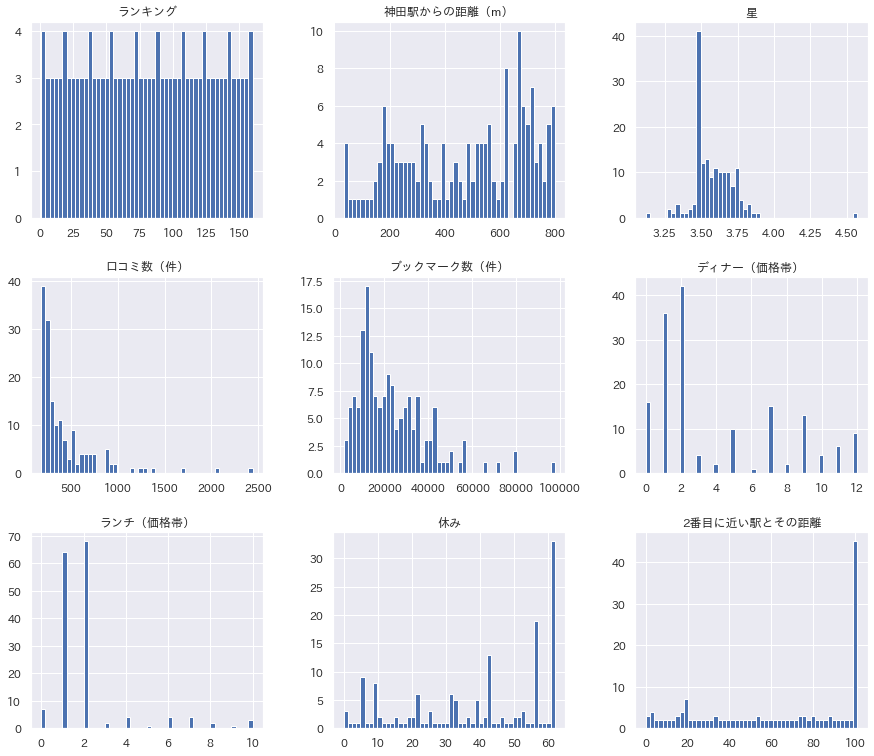

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import numpy as np

sns.set(font="IPAexGothic")

df.hist(bins=50, figsize=(15, 13))
plt.show()

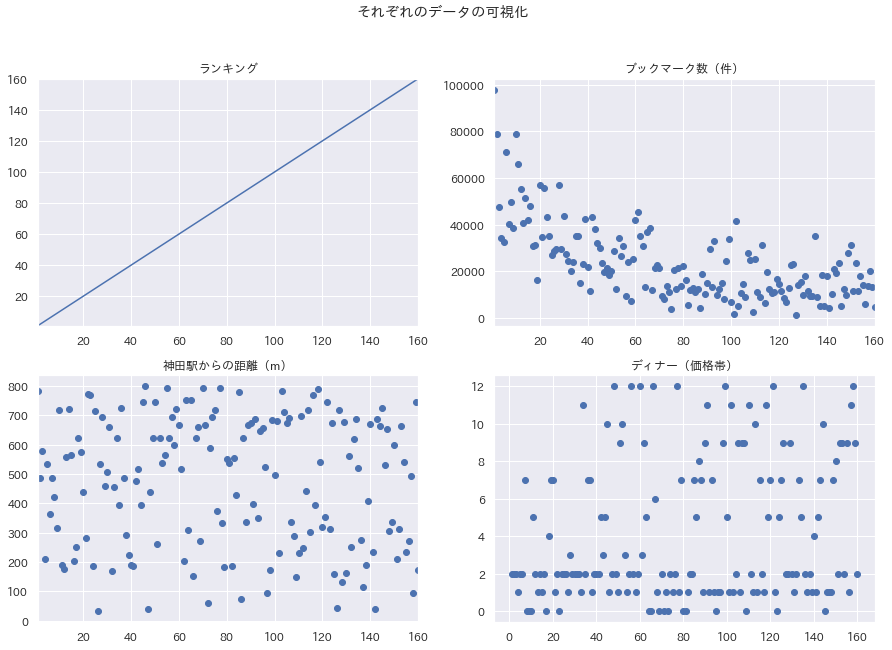

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("それぞれのデータの可視化")

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# サブプロットにデータをプロット
ax1.plot(df['ランキング'], df['ランキング'])
ax2.scatter(df['ランキング'], df['ブックマーク数（件）'])
ax3.scatter(df['ランキング'], df['神田駅からの距離（m）'])
ax4.scatter(df['ランキング'], df['ディナー（価格帯）'])

# labels=df.groupby('ディナー（価格帯）').groups.keys()
# ax4.pie(df.groupby('ディナー（価格帯）').groups.keys(), labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, pctdistance=1.2, labeldistance=0.8)

# タイトルをセット
ax1.set_title('ランキング')
ax2.set_title('ブックマーク数（件）')
ax3.set_title('神田駅からの距離（m）')
ax4.set_title('ディナー（価格帯）')

ax1.set_xlim(1, 160)
ax1.set_ylim(1, 160)
ax2.set_xlim(1, 160)
ax3.set_xlim(1, 160)

# 図を表示
plt.show()

In [ ]:
import seaborn as sns
df.corr()

,ランキング,神田駅からの距離（m）,星,口コミ数（件）,ブックマーク数（件）,ディナー（価格帯）,ランチ（価格帯）,休み,2番目に近い駅とその距離
ランキング,1.000000,-0.081324,-0.350416,-0.764694,-0.646973,0.230778,-0.161004,0.115896,0.032597
神田駅からの距離（m）,-0.081324,1.000000,0.045230,0.048427,0.034900,-0.017445,0.181847,0.014660,-0.632293
星,-0.350416,0.045230,1.000000,0.309451,0.438884,-0.059688,0.249613,-0.058252,-0.186165
口コミ数（件）,-0.764694,0.048427,0.309451,1.000000,0.764936,-0.212864,0.085225,-0.055177,0.049124
ブックマーク数（件）,-0.646973,0.034900,0.438884,0.764936,1.000000,0.016359,0.132907,0.032881,-0.058011
ディナー（価格帯）,0.230778,-0.017445,-0.059688,-0.212864,0.016359,1.000000,0.260934,0.219329,-0.210013
ランチ（価格帯）,-0.161004,0.181847,0.249613,0.085225,0.132907,0.260934,1.000000,0.074240,-0.332635
休み,0.115896,0.014660,-0.058252,-0.055177,0.032881,0.219329,0.074240,1.000000,0.084016
2番目に近い駅とその距離,0.032597,-0.632293,-0.186165,0.049124,-0.058011,-0.210013,-0.332635,0.084016,1.000000


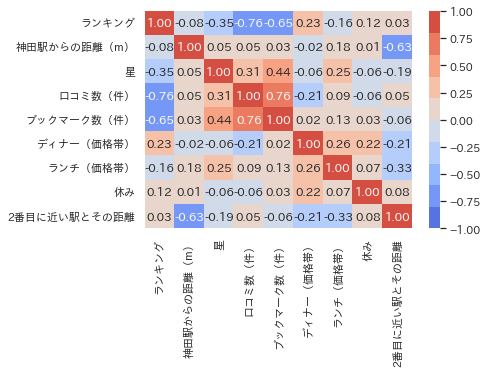

In [ ]:
sns.heatmap(df.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True, fmt='.2f', vmin = -1, vmax = 1)